In [1]:
from mmcv import collect_env
collect_env()

C:\Users\Shaheryar\anaconda3\envs\sord_env\lib\site-packages\mmcv\__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


UnsupportedOperation: fileno

In [2]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.10.2 True
2.26.0
11.3
MSVC 192829924


In [3]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth \
      -O checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth


A subdirectory or file checkpoints already exists.
--2022-11-25 09:43:22--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.218
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.218|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.



In [4]:
CFG_PATH='mmdetection/configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco.py'
CKPT_PATH='./checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'

In [5]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config =CFG_PATH
# Setup a checkpoint file to load
checkpoint = CKPT_PATH

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: ./checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth


FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [6]:
# Use the detector to do inference
img = 'test_img.jpg'
result = inference_detector(model, img)

d:\sord ai\src\mmdetection\mmdet\datasets\utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


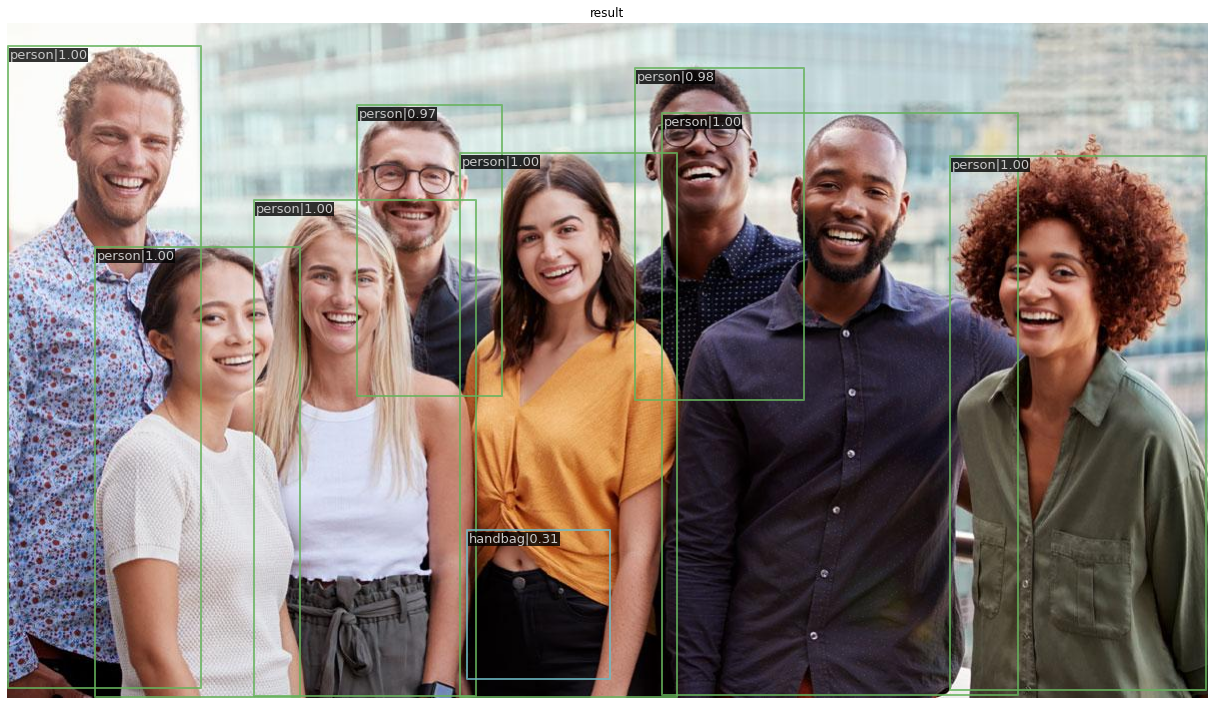

In [7]:
show_result_pyplot(model, img, result, score_thr=0.3)

In [24]:
from mmcv import Config
cfg = Config.fromfile(CFG_PATH)

categories=[{'name': 'l_klt_4147', 'id': 1011},
 {'name': 'l_=klt_6147', 'id': 1012},
 {'name': 'l_klt_8210', 'id': 1013},
 {'name': 'pallet', 'id': 1100},
 {'name': 'str', 'id': 2050},
 {'name': 'cabinet', 'id': 1040},
 {'name': 'locker', 'id': 1030},
 {'name': 'jack', 'id': 1120},
 {'name': 'dolly', 'id': 1110},
 {'name': 'spring_post', 'id': 1135},
 {'name': 'exit_sign', 'id': 4000},
 {'name': 'fire_extinguisher', 'id': 5010},
 {'name': 'stillage_open', 'id': 1003},
 {'name': 'stillage_close', 'id': 1002},
 {'name': 'cardboard_box', 'id': 1070},
 {'name': 'forklift', 'id': 2010},
 {'name': 'bicycle', 'id': 2000}]
ALL_CLASSES=[x['name'] for x in categories]

In [25]:
ALL_CLASSES

['l_klt_4147',
 'l_=klt_6147',
 'l_klt_8210',
 'pallet',
 'str',
 'cabinet',
 'locker',
 'jack',
 'dolly',
 'spring_post',
 'exit_sign',
 'fire_extinguisher',
 'stillage_open',
 'stillage_close',
 'cardboard_box',
 'forklift',
 'bicycle']

In [26]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'COCODataset'
cfg.data_root = ''


cfg.data.train.dataset.ann_file = 'all_images_coco.json'
cfg.data.train.dataset.img_prefix = ''
cfg.data.train.dataset.classes = ('l_klt_4147',
 'l_=klt_6147',
 'l_klt_8210',
 'pallet',
 'str',
 'cabinet',
 'locker',
 'jack',
 'dolly',
 'spring_post',
 'exit_sign',
 'fire_extinguisher',
 'stillage_open',
 'stillage_close',
 'cardboard_box',
 'forklift',
 'bicycle')


cfg.data.val.ann_file = 'all_images_coco.json'
cfg.data.val.img_prefix = ''
cfg.data.val.classes = ('l_klt_4147',
 'l_=klt_6147',
 'l_klt_8210',
 'pallet',
 'str',
 'cabinet',
 'locker',
 'jack',
 'dolly',
 'spring_post',
 'exit_sign',
 'fire_extinguisher',
 'stillage_open',
 'stillage_close',
 'cardboard_box',
 'forklift',
 'bicycle')

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes =len(ALL_CLASSES)
# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
# cfg.load_from = CKPT_PATH

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=12)
log_config = dict(
    interval=10,
    hooks=[dict(type='TextLoggerHook'),
           dict(type='TensorboardLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=16)
dataset_type = 'COCODataset'
data_root = ''
img_norm_cfg = dict(
    mean=[103.53, 116.28, 123.675], std=[1.0, 1.0, 1.0], to_rgb=False)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='Resize',
        img_scale=[(1333, 640), (1333, 800)],
        multiscale_mode='range',
        keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Normalize',
        mean=[103.53, 116.28, 123.675],
        std=[1.0, 1.0, 1.0],
        to_rgb=False),
    dict(ty

In [23]:
import os

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir


loading annotations into memory...


In [ ]:
# (os.mkdir(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)